# Table of Contents

(1) Introduction

(2) Exploratory Data Analysis

(3) Conclusions

# Introduction

In this project, I will analyzing local and global temperature data and comparing the temperature trends where I live to overall global temperature trends. The goal of this project is to to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where I live. 

To analyze the global and local temparatures, I will be using the following database:

`city_list` - This contains a list of cities and countries in the database.


`city_data` - This contains the average temperatures for each city by year (ºC). I'm choosing `Dallas` for the analysis as I live here now.


`global_data` - This contains the average global temperatures by year (ºC).

# Exploratory Data Analysis

#### Importing the Libraris

In [410]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing the Datasets

In [411]:
city_list = pd.read_csv('city_list.csv')

city_data = pd.read_csv('city_data.csv')

global_data = pd.read_csv('global_data.csv')

#### Assessing the Data

In [424]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [425]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
year        70792 non-null int64
city        70792 non-null object
country     70792 non-null object
avg_temp    68245 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [426]:
city_data.isnull().any()

year        False
city        False
country     False
avg_temp     True
dtype: bool

In [427]:
len(city_data[city_data.avg_temp.isnull()])

2547

In [428]:
len(city_data[city_data.avg_temp.isnull()].city.unique())

235

- 235 unique cities are missing the `avg_temp` 

In [429]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [430]:
city_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
city       342 non-null object
country    342 non-null object
dtypes: object(2)
memory usage: 5.5+ KB


In [431]:
city_list.isnull().any()

city       False
country    False
dtype: bool

- `city_list` don't have any missing values

In [432]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [433]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [434]:
global_data.isnull().any()

year        False
avg_temp    False
dtype: bool

- `global_data` don't have any missing values

In the following code, I will be getting the average temparature data of my city which is `Dallas`

In [435]:
dallas = city_data[(city_data.city == 'Dallas')]

In [436]:
dallas.head()

,year,city,country,avg_temp
17686,1820,Dallas,United States,16.88
17687,1821,Dallas,United States,17.33
17688,1822,Dallas,United States,17.87
17689,1823,Dallas,United States,17.46
17690,1824,Dallas,United States,17.90


In [437]:
len(dallas.year)

194

In [438]:
dallas.year.nunique()

194

In [439]:
len(global_data)

266

In [440]:
global_data.year.nunique()

266

As you can see that there is a difference in the count of the data of `dallas` and `globa_ldata`. Here, the temparature data for `global_data` is avalible from `1750` to `2015`and where as for `dallas`, it is avalible from `1820` to `2013` only. So I decided to extract the data from only year `1820` from the `global data` so that our comparasions will make sense as we are finding the differences in global and local temparatures in the same time frame.

In [441]:
global_data = global_data[(global_data.year >= 1820) & (global_data.year <= 2013) ]

global_data.head()

,year,avg_temp
70,1820,7.62
71,1821,8.09
72,1822,8.19
73,1823,7.72
74,1824,8.55


#### Descriptve Statistics

In [442]:
dallas.avg_temp.describe()

count    194.000000
mean      18.065876
std        0.680021
min       16.540000
25%       17.612500
50%       18.025000
75%       18.437500
max       20.450000
Name: avg_temp, dtype: float64

In [443]:
global_data.avg_temp.describe()

count    194.000000
mean       8.466598
std        0.495271
min        7.380000
25%        8.122500
50%        8.430000
75%        8.737500
max        9.730000
Name: avg_temp, dtype: float64

#### Observations

#### From the descriptive statistics of the `avg_temp`, we can undestand the following points

- The mean of `avg_temp` for `Dallas` is always higher than the mean of `avg_temp` for globally


- The variation in `avg_temp` for `Dallas` is higher than the variation of `avg_temp` for globally




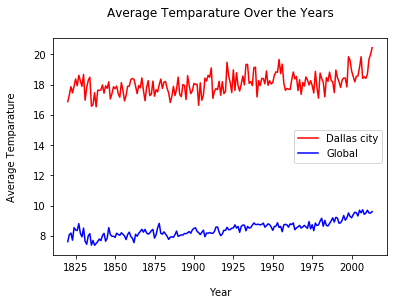

In [444]:
plt.plot( dallas.year , dallas.avg_temp, color = 'Red', label = 'Dallas city')
plt.plot( global_data.year , global_data.avg_temp, color = 'blue', label = 'Global')
plt.xlabel('\nYear')
plt.ylabel('Average Temparature\n')
plt.title('Average Temparature Over the Years\n');
plt.legend();


#### Observations

- From the above figure, we can cleary observe that there is considerably good difference between the `Dallas` average temparature and the `global average` temparature and it is always less than that of `Dallas` temparature for every year from 1820 to 2013.

In [445]:
len(global_data) == len(dallas)

True

#### Finding Moving Averages

- Moving averages are used to smooth out data to make it easier to observe long term trends and not get lost in daily/montly/yearly fluctuations. For example, let's say you wanted to visualize the sales trend at a clothing retail store. You start with daily data, and your chart looks too volatile to interpret because more people shop on the weekends, so sales spike on those days.

In [446]:
avg_number = 10

dallas['rolling_avg_temp'] = dallas['avg_temp'].rolling(window = avg_number).mean()

dallas.reset_index(inplace = True, drop = True)

global_data['rolling_avg_temp'] = global_data['avg_temp'].rolling(window = avg_number).mean()

global_data.reset_index(inplace = True, drop = True)


In [447]:
dallas[:20]

,year,city,country,avg_temp,rolling_avg_temp
0,1820,Dallas,United States,16.88,NaN
1,1821,Dallas,United States,17.33,NaN
2,1822,Dallas,United States,17.87,NaN
3,1823,Dallas,United States,17.46,NaN
4,1824,Dallas,United States,17.90,NaN
5,1825,Dallas,United States,18.38,NaN
6,1826,Dallas,United States,17.93,NaN
7,1827,Dallas,United States,18.62,NaN
8,1828,Dallas,United States,18.26,NaN
9,1829,Dallas,United States,17.89,17.852


In [448]:
global_data[0:20]

,year,avg_temp,rolling_avg_temp
0,1820,7.62,NaN
1,1821,8.09,NaN
2,1822,8.19,NaN
3,1823,7.72,NaN
4,1824,8.55,NaN
5,1825,8.39,NaN
6,1826,8.36,NaN
7,1827,8.81,NaN
8,1828,8.17,NaN
9,1829,7.94,8.184


# Explanatory Diagrams

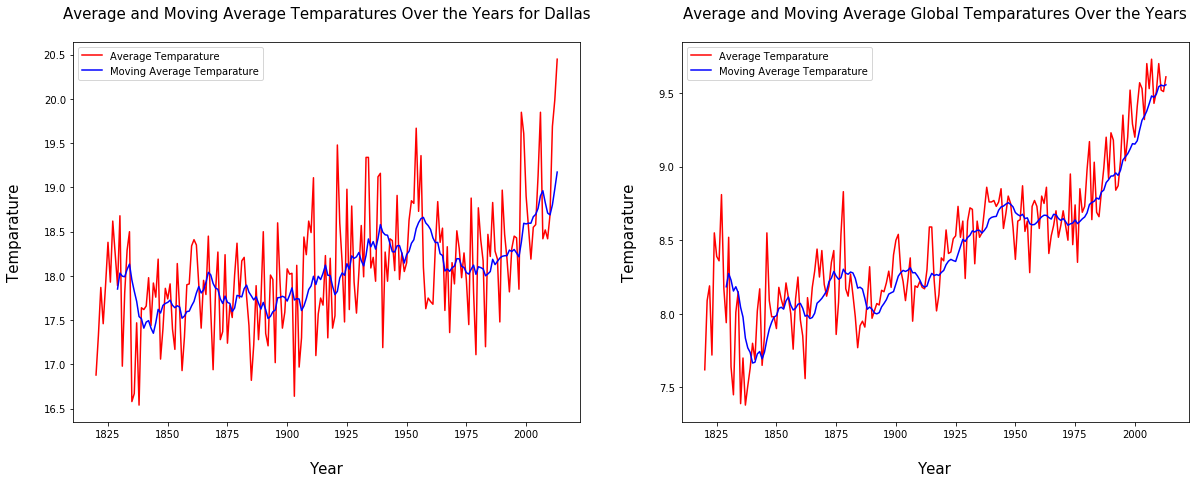

In [449]:
plt.figure(figsize = [20, 7]);
plt.subplot(1, 2, 1);
plt.plot( dallas.year , dallas.avg_temp, color = 'Red', label = 'Average Temparature')
plt.plot( dallas.year , dallas.rolling_avg_temp, color = 'blue', label = 'Moving Average Temparature' )
plt.xlabel('\nYear', fontsize = 15)
plt.ylabel('Temparature\n',fontsize = 15)
plt.title('Average and Moving Average Temparatures Over the Years for Dallas\n', fontsize = 15);
plt.legend();

plt.subplot(1, 2, 2);
plt.plot( global_data.year , global_data.avg_temp, color = 'Red', label = 'Average Temparature')
plt.plot( global_data.year , global_data.rolling_avg_temp, color = 'blue', label = 'Moving Average Temparature')
plt.xlabel('\nYear', fontsize = 15)
plt.ylabel('Temparature\n',fontsize = 15)
plt.title('Average and Moving Average Global Temparatures Over the Years\n', fontsize = 15);
plt.legend();


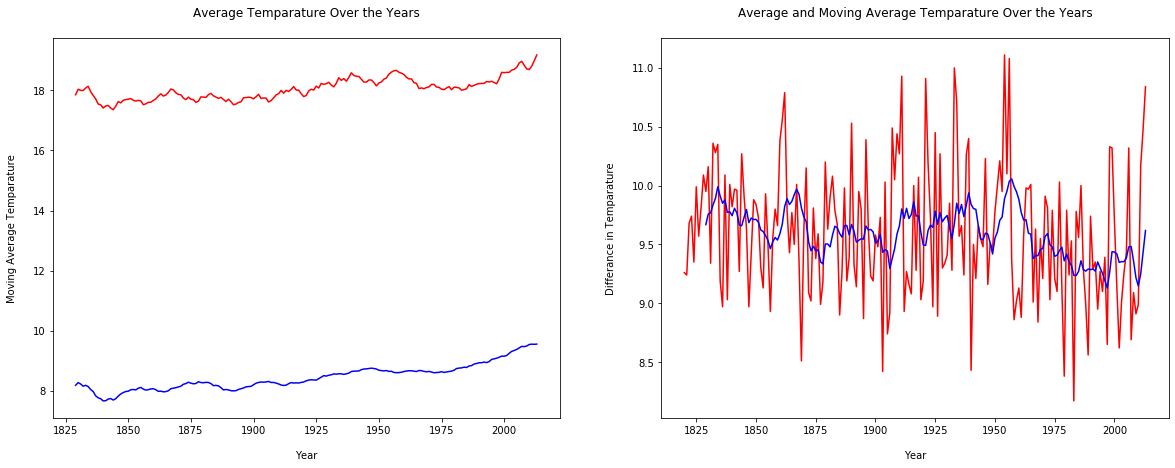

In [450]:
plt.figure(figsize = [20, 7]);
plt.subplot(1, 2, 1);
plt.plot( dallas.year , dallas.rolling_avg_temp, color = 'Red')
plt.plot( global_data.year , global_data.rolling_avg_temp, color = 'blue')
plt.xlabel('\nYear')
plt.ylabel('Moving Average Temparature\n')
plt.title('Average Temparature Over the Years\n');

plt.subplot(1, 2, 2);
plt.plot( dallas.year , dallas.avg_temp - global_data.avg_temp, color = 'Red')
plt.plot( dallas.year , dallas.rolling_avg_temp - global_data.rolling_avg_temp, color = 'blue')
plt.xlabel('\nYear')
plt.ylabel('Differance in Temparature\n')
plt.title('Average and Moving Average Temparature Over the Years\n');


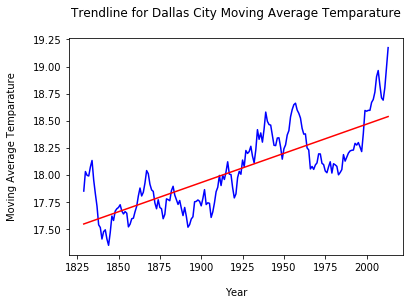

In [451]:
y = dallas.rolling_avg_temp[9:]
x = np.array(dallas.year[9:]) 
x = x.reshape(len(x),1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.plot( dallas.year[9:] , dallas.rolling_avg_temp[9:], color = 'blue')
plt.plot( dallas.year[9:] , y_pred, color = 'red')
plt.xlabel('\nYear')
plt.ylabel('Moving Average Temparature\n')
plt.title('Trendline for Dallas City Moving Average Temparature\n');


In [452]:
print('The coefficient of Dallas City Moving Average Temparature is =  ', model.coef_)

The coefficient of Dallas City Moving Average Temparature is =   [0.00538138]


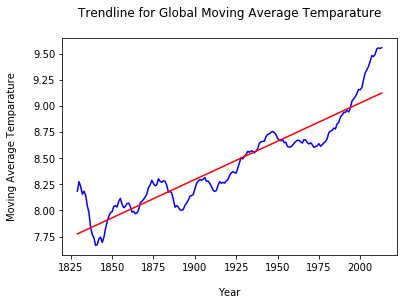

In [453]:
y = global_data.rolling_avg_temp[9:]
x = np.array(dallas.year[9:]) 
x = x.reshape(len(x),1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.plot( dallas.year[9:] , global_data.rolling_avg_temp[9:], color = 'blue')
plt.plot( dallas.year[9:] , y_pred, color = 'red')
plt.xlabel('\nYear')
plt.ylabel('Moving Average Temparature\n')
plt.title('Trendline for Global Moving Average Temparature\n');


In [454]:
print('The coefficient of Global Moving Average Temparature is =  ', model.coef_)

The coefficient of Global Moving Average Temparature is =   [0.00732186]


In [455]:
y = dallas.rolling_avg_temp[9:] - global_data.rolling_avg_temp[9:]
x = np.array(dallas.year[9:]) 
x = x.reshape(len(x),1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

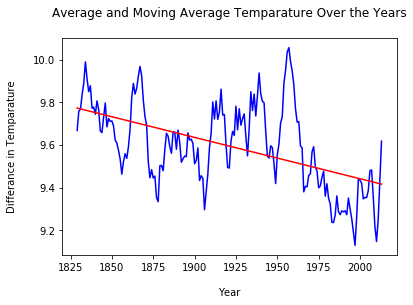

In [456]:
plt.plot( dallas.year[9:] , dallas.rolling_avg_temp[9:] - global_data.rolling_avg_temp[9:], color = 'blue')
plt.plot( dallas.year[9:] , y_pred, color = 'red')
plt.xlabel('\nYear')
plt.ylabel('Differance in Temparature\n')
plt.title('Average and Moving Average Temparature Over the Years\n');


In [457]:
print('The coefficient of difference of local and global moving average temparature =  ', model.coef_)

The coefficient of difference of local and global moving average temparature =   [-0.00194048]


# Conclusions

#### Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?



- Dallas `moving_average_temparature` is always higher than `global_moving_average_temparature` and the difference between both of these has a negative slope with a slope of `-0.00194048` and which means as the years passing, the global and local temparatures are becoming close to each other. So, for every year passing, there will be a decrement of 0.1% in the difference of moving average temparatures between local (Dallas city) and global.

#### How do the changes in your city’s temperatures over time compare to the changes in the global average?


- `Dallas` city temparature is increasing as we can observe from the trend line temparature over the years. The trend line has a positive slope of `0.00538138` which means for every year passing, there will be a increment of 0.5% in the moving average temparature of Dallas city.

#### What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

- Global temparature is increasing as we can observe from the trend line temparature over the years. The trend line has a positive slope of `0.00732186` which means for every year passing, there will be a increment of 0.7% in the global moving average temparature.